In [ ]:
import numpy as np
import pandas as pd
import acquire as a 
import prepare as p
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Zillow

For the following, iterate through the steps you would take to create functions: Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions.

You will have a zillow.ipynb file and a helper file for each section in the pipeline.

### acquire & summarize

1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

- Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
- Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.
- Only include properties that include a latitude and longitude value.

In [ ]:
#write a query (this is from sql)

In [ ]:
sql_query = '''
SELECT prop.parcelid,  prop.basementsqft, bathroomcnt, bedroomcnt, decktypeid, calculatedfinishedsquarefeet,
fips, fireplacecnt, garagecarcnt, hashottuborspa, latitude, longitude, lotsizesquarefeet, poolcnt,
yearbuilt, numberofstories, prop.airconditioningtypeid, airconditioningdesc, prop.architecturalstyletypeid,
architecturalstyledesc, prop.buildingclasstypeid, buildingclassdesc, prop.heatingorsystemtypeid,
heatingorsystemdesc, prop.storytypeid, storydesc, prop.propertylandusetypeid, propertylandusedesc, 
prop.typeconstructiontypeid, typeconstructiondesc, unitcnt, taxvaluedollarcnt, taxamount, logerror, transactiondate 
from properties_2017 as prop
join predictions_2017 as pred USING (parcelid)
LEFT JOIN airconditioningtype USING (airconditioningtypeid)
LEFT JOIN architecturalstyletype USING (architecturalstyletypeid)
LEFT JOIN buildingclasstype USING (buildingclasstypeid)
LEFT JOIN heatingorsystemtype USING (heatingorsystemtypeid)
LEFT JOIN propertylandusetype USING (propertylandusetypeid)
LEFT JOIN storytype USING(storytypeid)
LEFT JOIN typeconstructiontype USING (typeconstructiontypeid)
WHERE transactiondate like '2017%' 
AND latitude >= 0 AND longitude <= 0;
'''

In [ ]:
sql_query2 ='''
SELECT prop.parcelid,  prop.basementsqft, bathroomcnt, bedroomcnt, decktypeid, calculatedfinishedsquarefeet,
fips, fireplacecnt, garagecarcnt, hashottuborspa, latitude, longitude, lotsizesquarefeet, poolcnt,
yearbuilt, numberofstories, prop.airconditioningtypeid, airconditioningdesc, prop.architecturalstyletypeid,
architecturalstyledesc, prop.buildingclasstypeid, buildingclassdesc, prop.heatingorsystemtypeid,
heatingorsystemdesc, prop.storytypeid, storydesc, prop.propertylandusetypeid, propertylandusedesc, 
prop.typeconstructiontypeid, typeconstructiondesc, unitcnt, taxvaluedollarcnt, taxamount, logerror, transactiondate 
from properties_2017 as prop
join predictions_2017 as pred USING (parcelid)
LEFT JOIN airconditioningtype USING (airconditioningtypeid)
LEFT JOIN architecturalstyletype USING (architecturalstyletypeid)
LEFT JOIN buildingclasstype USING (buildingclasstypeid)
LEFT JOIN heatingorsystemtype USING (heatingorsystemtypeid)
LEFT JOIN propertylandusetype USING (propertylandusetypeid)
LEFT JOIN storytype USING(storytypeid)
LEFT JOIN typeconstructiontype USING (typeconstructiontypeid)
WHERE transactiondate like '2017%'  
AND latitude != 'NULL' AND longitude != 'NULL';
'''

In [ ]:
#acquire my df
df= a.get_data_from_sql('zillow',sql_query2)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
#checking the unique values
df['parcelid'].nunique()

In [ ]:
#getting the latest transaction . fist we need to sort the transaction dates and then drop duplicates and keep last
df1 = df.sort_values(by ='transactiondate', ascending=True).drop_duplicates( subset = 'parcelid' ,keep= 'last')

In [ ]:
#just checking if the df1 has the latest transactiondate
df1[df1['parcelid'] == 10857130]

In [ ]:
#we have the same number as nunique
df1.shape

In [ ]:
df1.info()

**2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)**

In [ ]:
df1.head(3)

In [ ]:
df1.info()

In [ ]:
df1.dtypes

In [ ]:
df1.describe()

In [ ]:
df1['parcelid'].nunique()

In [ ]:
len(df1.parcelid)

In [ ]:
df1.select_dtypes(include = 'O').columns.to_list()

In [ ]:
num_cols = df1.select_dtypes(exclude = 'O').columns.to_list()
cat_cols = df1.select_dtypes(include = 'O').columns.to_list()
for col in df.columns:
        print(f'**{col}**')
        le = df1[col].nunique()
        print ('Unique Values : ', df1[col].nunique())
        print(' ')
        if col in cat_cols and le < 13:
            print(df1[col].value_counts())
        if col in num_cols and  le < 23:
             print(df1[col].value_counts().sort_index(ascending=True)) 
        elif col in num_cols and le <150:
            print(df1[col].value_counts(bins=10, sort=False).sort_index(ascending=True))
        elif col in num_cols and le <1001:
            print(df1[col].value_counts(bins=100, sort=False).sort_index(ascending=True))

        print('=====================================================')

In [ ]:
def report_unique_val (df):
    num_cols = df.select_dtypes(exclude = 'O').columns.to_list()
    cat_cols = df.select_dtypes(include = 'O').columns.to_list()
    for col in df.columns:
            print(f'**{col}**')
            le = df[col].nunique()
            print ('Unique Values : ', df[col].nunique())
            print(' ')
            if col in cat_cols and le < 15:
                print(df[col].value_counts())
            if col in num_cols and  le < 23:
                 print(df[col].value_counts().sort_index(ascending=True)) 
            elif col in num_cols and le <150:
                print(df[col].value_counts(bins=10, sort=False).sort_index(ascending=True))
            elif col in num_cols and le <1001:
                print(df[col].value_counts(bins=100, sort=False).sort_index(ascending=True))

            print('=====================================================')

In [ ]:
report_unique_val(df1)

**3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.**

In [ ]:
a.miss_dup_values(df1)

**4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.**

In [ ]:
def nulls_by_row(df):
    '''
    akes in a dataframe and returns a dataframe with 3 columns: 
    the number of columns missing, percent of columns missing, and number of rows with n columns missing
    '''
    num_missing = df.isnull().sum(axis=1)
    prcnt_miss = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': prcnt_miss})\
    .reset_index()\
    .groupby(['num_cols_missing', 'percent_cols_missing']).count()\
    .rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return rows_missing

In [ ]:
nulls_by_row (df1)

## Prepare 

**1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.**

In [ ]:
#lest see the columns that help me to identify single unit properties
df1[['parcelid', 'bedroomcnt', 'bathroomcnt', 'propertylandusedesc', 'calculatedfinishedsquarefeet','unitcnt']].head()


In [ ]:
#check the values for propertylanduse
df1.propertylandusedesc.value_counts()

In [ ]:
#this list has all types of single unit properties
single= ['Single Family Residential',' Mobile Home' , 'Townhouse '  ]


In [ ]:
#use isin() to  get the all the properties of this type
df1['propertylandusedesc'].isin(single).head()

In [ ]:
#checking the condition
df1[['unitcnt']][(df1['unitcnt'] == 1) | (df1['unitcnt'] == 'NaN')].value_counts()

In [ ]:
#checking if we get nulls
df1[['unitcnt']][(df1['unitcnt'] == 1) | (df1['unitcnt'].isnull())].isnull().sum()

In [ ]:
#create a mask
single_mask = df1['propertylandusedesc'].isin(single)

In [ ]:
#using that mask and also addind a condition
df1[single_mask | (df1['unitcnt'] == 1)].shape

In [ ]:
#using that mask and also add  a condition
df_single = df1[single_mask & ((df1['unitcnt'] == 1) | (df1['unitcnt'].isnull()))]

In [ ]:
df_single.head()

In [ ]:
df_single.shape

In [ ]:
df_single['unitcnt'].value_counts()

In [ ]:
df_single['unitcnt'].isna().sum()

In [ ]:
df_single[['propertylandusedesc']][df_single['unitcnt'] > 1]

**2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).**
- The input:
    - A dataframe
        -A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
- The output:
    - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
- hint:
    - Look up the dropna documentation.
    - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
    - Make use of inplace, i.e. inplace=True/False.


In [ ]:
a.miss_dup_values(df_single)

In [ ]:
nulls_by_row(df_single)

In [ ]:
a.miss_dup_values(df_single)

In [ ]:
def handle_missing_values(df, prop_required_columns=0.5, prop_required_row=0.75):
    threshold = int(round(prop_required_columns * len(df.index),0))
    df = df.dropna(axis=1, thresh=threshold)
    threshold = int(round(prop_required_row * len(df.columns),0))
    df = df.dropna(axis=0, thresh=threshold)
    
    #drop rows with null values < 1
    lis =((100 * df.isnull().sum() / len(df))> 0) &  ((100 * df.isnull().sum() / len(df))< 1)
    col_drop = list(lis[lis == True].index)
    df = df.dropna(axis=0, subset = col_drop)
     
    return df

In [ ]:
lis =((100 * df_single.isnull().sum() / len(df_single))> 0) &  ((100 * df_single.isnull().sum() / len(df_single))< 1)

In [ ]:
col_drop = list(lis[lis == True].index)

In [ ]:
col_drop

In [ ]:
df_single.shape

In [ ]:
df_clean= handle_missing_values(df_single, .5, .75)


In [ ]:
df_clean.shape

**3. Decide how to handle the remaining missing values:**

- Fill with constant value.
- Impute with mean, median, mode.
- Drop row/column

**Note: handle_missing_values also remove the rows that has columuns with missing values less than 1%**

In [ ]:
missing = a.miss_dup_values(df_clean)
missing

In [ ]:
missing.index.to_list()

In [ ]:
#checking thecolumns that have missing values
df_clean[missing.index.to_list()].describe().T

In [ ]:
#for calculatedfinishedsquarefeet I will check if there any other house with the same # bedrooms and bathrooms
df_clean[df_clean['calculatedfinishedsquarefeet'].isnull()]

In [ ]:
#checking if there are another properties with same bedrooms, bathrooms and lotsize

In [ ]:
df_clean[(df_clean['bathroomcnt'] == 4.5 ) & (df_clean['bedroomcnt'] == 5 ) & (df_clean['lotsizesquarefeet'] > 200000)]

** I decide to drop those rows**

In [ ]:
df_clean.dropna(axis=0, subset=['calculatedfinishedsquarefeet'], inplace = True)

In [ ]:
df_clean[df_clean['calculatedfinishedsquarefeet'].isnull()]

In [ ]:
#for  unitcnt I will add 1 because it is single unit property

In [ ]:
df_clean['unitcnt'].fillna(1, inplace= True)

In [ ]:
df_clean['unitcnt'].isnull().sum()

In [ ]:
a.miss_dup_values(df_clean)

In [ ]:
# lets check heatingorsystemtypeid and  heatingorsystemtypeid. they have the same information
df_clean['heatingorsystemdesc'].isnull()

In [ ]:
df_clean['heatingorsystemdesc'].value_counts()

In [ ]:
df_clean['heatingorsystemtypeid'].value_counts()

In [ ]:
#I will add with the most frequent value

In [ ]:
df_clean= df_clean.drop(columns = 'heatingorsystemdesc')

In [ ]:
most_f =df_clean['heatingorsystemtypeid'].mode()[0]
most_f

In [ ]:
df_clean['heatingorsystemtypeid'].fillna(most_f, inplace= True)

In [ ]:
df_clean['heatingorsystemtypeid'].isnull().sum()

In [ ]:
#let's see the columns with missing values

In [ ]:
miss = a.miss_dup_values(df_clean)
miss

In [ ]:
df_clean['yearbuilt'].describe()

In [ ]:
#I will drop them 
list_miss = miss.index.to_list()

In [ ]:
#df_clean.drop(columns = list_miss)

In [ ]:
a.miss_dup_values(df_clean)

In [ ]:
df_clean.shape

In [ ]:
df_clean= df_clean.dropna(axis = 0, subset = list_miss )

In [ ]:
df_clean.shape

In [ ]:
a.miss_dup_values(df_clean)

### wrangle_zillow.py
**Functions of the work above needed to acquire and prepare a new sample of data.**

In [ ]:
def wrangle_zillow ( sql_query, prop_required_columns=0.5, prop_required_row=0.75):
    
    #acquire data
    df= a.get_data_from_sql('zillow',sql_query)
    
    #getting the latest transactions 
    df1 = df.sort_values(by ='transactiondate', ascending=True).drop_duplicates( subset = 'parcelid' ,keep= 'last')
    
    #this list has all types of single unit properties
    single= ['Single Family Residential',' Mobile Home' , 'Townhouse '  ]
    #create a mask
    single_mask = df1['propertylandusedesc'].isin(single)
    #using that mask and also add  a condition
    df_single = df1[single_mask & ((df1['unitcnt'] == 1) | (df1['unitcnt'].isnull()))]
    
    #missing values
    df_clean = handle_missing_values(df_single, prop_required_columns, prop_required_row)
    
    #fill missing values in unitcnt
    df_clean['unitcnt'].fillna(1, inplace= True)
    
    #fill missing values heatingorsystemtypeid
    most_f =df_clean['heatingorsystemtypeid'].mode()[0]
    df_clean['heatingorsystemtypeid'].fillna(most_f, inplace= True)
    
    #drop duplicated rows
    df_clean= df_clean.drop(columns = 'heatingorsystemdesc')
    
    return df_clean
    

In [ ]:
df =wrangle_zillow ( sql_query, prop_required_columns=0.5, prop_required_row=0.75)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
a.miss_dup_values(df)

In [ ]:
import wrangle_zillow as w

In [ ]:
df = w.wrangle_zillow(sql_query2,prop_required_columns=0.5,prop_required_row=0.75,)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
a.miss_dup_values(df)

In [ ]:
a.summarize(df)

____________________________

# Mall Customers

### notebook

**1. Acquire data from mall_customers.customers in mysql database.**


In [ ]:
def get_mallcustomer_data():
    df = pd.read_sql('SELECT * FROM customers;', a.get_connection('mall_customers'))
    return df.set_index('customer_id')

In [ ]:
df_mall = get_mallcustomer_data()

**2. Summarize data (include distributions and descriptive statistics).**

In [ ]:
a.summarize(df_mall)

**3. Detect outliers using IQR.**

In [ ]:
def get_upper_outliers(s, k):
    q1, q3 = s.quantile([.25,0.75])
    iqr = q3 -q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max ([x - upper_bound, 0]))

In [ ]:
def add_upper_outlier_columns(df, k = 1.5):
    for col in df.select_dtypes('number'):
        df[col + '_outliers_upper'] = get_upper_outliers(df[col], k)
    return df

In [ ]:
df_mall = add_upper_outlier_columns(df_mall)

In [ ]:
df_mall.head()

In [ ]:
outlier_cols = [col for col in df_mall.columns if col.endswith('_outliers_upper')]
for col in outlier_cols:
    print(col, ': ')
    subset = df_mall[col][df_mall[col]>0]
    print(subset.describe())

In [ ]:
***4. Split data (train, validate, and test split)***

In [ ]:
df_mall.shape

In [ ]:
train, validate, test =p.split_data(df_mall)

**5. Encode categorical columns using a one hot encoder (pd.get_dummies).**

In [ ]:
dummy_train = pd.get_dummies(train[['gender']], dummy_na=False, drop_first=[True])
dummy_train.head()

In [ ]:
train= pd.concat([train, dummy_train], axis=1)
train.head(1)

In [ ]:
dummy_val = pd.get_dummies(validate[['gender']], dummy_na=False, drop_first=[True])
dummy_val.head()

In [ ]:
validate= pd.concat([validate, dummy_val], axis=1)
validate.head(1)

In [ ]:
dummy_test = pd.get_dummies(test[['gender']], dummy_na=False, drop_first=[True])
dummy_test.head()

In [ ]:
test= pd.concat([test, dummy_test], axis=1)
test.head(1)

In [ ]:
6. Handles missing values.

In [ ]:
a.miss_dup_values(train)

In [ ]:
a.miss_dup_values(validate)

In [ ]:
a.miss_dup_values(test)

**7. Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [ ]:
train , validate , test = p.scaled_df( train , validate , test,  MinMaxScaler())

### wrangle_mall.py

In [ ]:
1. Acquire data from mall_customers.customers in mysql database.
2. Split the data into train, validate, and split
3. One-hot-encoding (pd.get_dummies)
4. Missing values
5. Scaling

In [ ]:
def wrangle_mall():
    #acquire data
    df= get_mallcustomer_data()
    print('df shape', df.shape)
    
    #split data (use my function that is prepare.py)
    train, validate, test =p.split_data(df)
    
    #encode data
    #train
    dummy_train = pd.get_dummies(train[['gender']], dummy_na=False, drop_first=[True])
    train= pd.concat([train, dummy_train], axis=1)
    #validate
    dummy_val = pd.get_dummies(validate[['gender']], dummy_na=False, drop_first=[True])
    validate= pd.concat([validate, dummy_val], axis=1)
    #test
    dummy_test = pd.get_dummies(test[['gender']], dummy_na=False, drop_first=[True])
    test= pd.concat([test, dummy_test], axis=1)
    
    #scaling (use my function that is prepare.py)
    train , validate , test = p.scaled_df( train , validate , test,  MinMaxScaler())
    
    return train , validate , test

    
    

In [ ]:
train , validate , test= wrangle_mall()

In [1]:
import wrangle_mall as wm

df shape (200, 4)
train -> (112, 4)
validate -> (48, 4)
test -> (40, 4)


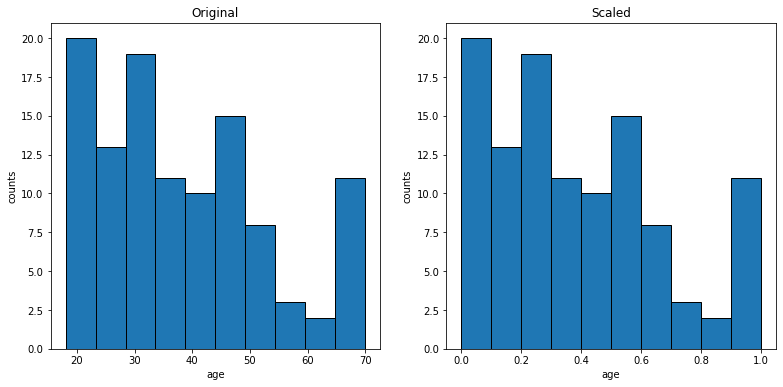

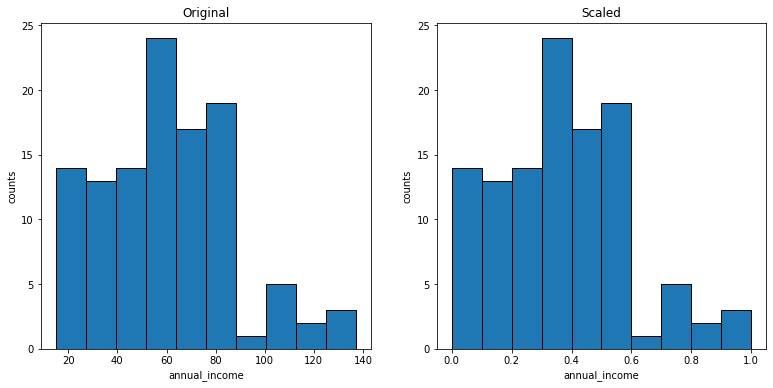

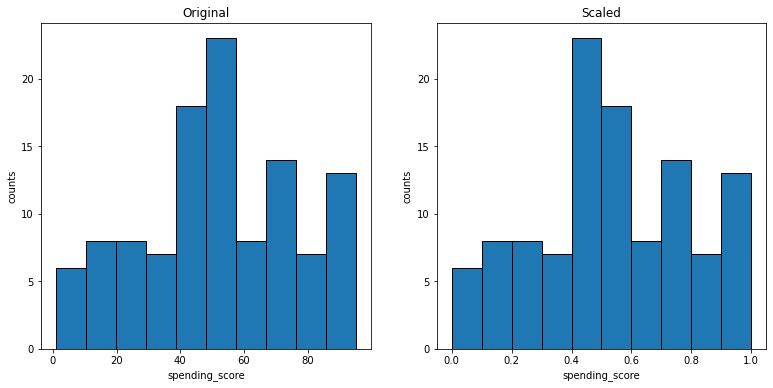

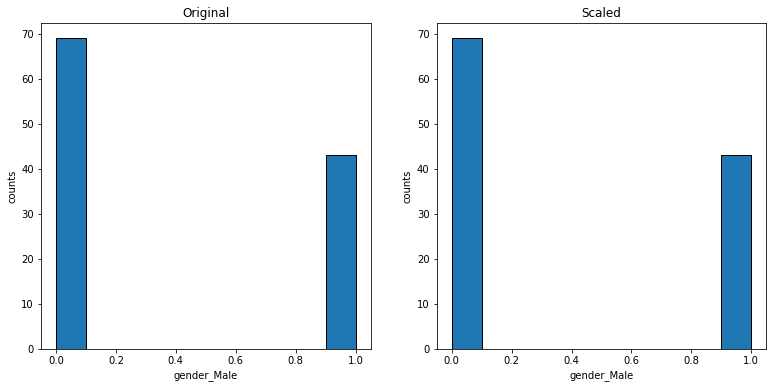

In [2]:
train , validate , test= wm.wrangle_mall()